In [11]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

# Cross Validation methods

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import TimeSeriesSplit


# Load time series data into a Pandas dataframe
df = pd.read_csv('data-sets/Alcohol_Sales.csv', index_col=0, parse_dates=True)

# Define the number of lagged values
n_lags = 3

# Create the feature matrix X and target vector y
X = pd.DataFrame(index=df.index)
for lag in range(1, n_lags+1):
    X[f'lag_{lag}'] = df.shift(lag)
X.dropna(inplace=True)
y = df.loc[X.index]


# Define the number of rolling windows and the window size
n_windows = 5
window_size = len(X) // n_windows

# Initialize the cross-validators
k_fold_cv = KFold(n_splits=n_windows)
shuffles_split_cv = ShuffleSplit(n_splits=n_windows)
stratified_k_fold_cv = StratifiedKFold(n_splits=n_windows)
stratified_shuffle_split_cv = StratifiedShuffleSplit(n_splits=n_windows)
group_k_fold_cv = GroupKFold(n_splits=n_windows)
stratified_group_k_fold_cv = StratifiedGroupKFold(n_splits=n_windows)
group_shuffle_split_cv = GroupShuffleSplit(n_splits=n_windows)
timeSeries_split_cv = TimeSeriesSplit(n_splits=n_windows)

cv_array = [shuffles_split_cv, k_fold_cv, timeSeries_split_cv]



# Initialize the Support Vector Regression model
svr = SVR(kernel='rbf', C=500, gamma=0.1, epsilon=.1)

# Iterate over the rolling windows and train/test the model
for cv in cv_array:
    sum_of_mape = 0
    for i, (train_index, test_index) in enumerate(cv.split(X)):
        # Split the data into training and testing sets
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        # Preprocess the data by scaling it
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        

        # Train the Support Vector Regression model on the training data
        svr.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = svr.predict(X_test)

        # Evaluate the performance of the model using the Mean Absolute Percentage Error
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        sum_of_mape += mape
    
    average_mape = sum_of_mape / cv.get_n_splits()
    print(f'Average MAPE for {cv}: {average_mape * 100:.2f}%\n')

Average MAPE for ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None): 11.18%

Average MAPE for KFold(n_splits=5, random_state=None, shuffle=False): 15.13%

Average MAPE for TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None): 19.20%



/Users/mustafasoydan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mustafasoydan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mustafasoydan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mustafasoydan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was pass

In [12]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted meantemp'])
y_pred

,Predicted meantemp
0,10194.789775
1,10223.363060
2,10358.635076
3,10034.975529
4,10180.941953
5,8905.432682
6,9500.449576
7,9975.064901
8,10198.933369
9,10323.188659


In [13]:
y_test

,S4248SM144NCEN
DATE,
2014-09-01,10828
2014-10-01,11817
2014-11-01,10470
2014-12-01,13310
2015-01-01,8400
2015-02-01,9062
2015-03-01,10722
2015-04-01,11107
2015-05-01,11508


In [14]:
# create a list of numbers from 0 to 52
numbers = list(range(53))

# create a pandas DataFrame from the list
index = pd.DataFrame(numbers, columns=['Number'])
index

,Number
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


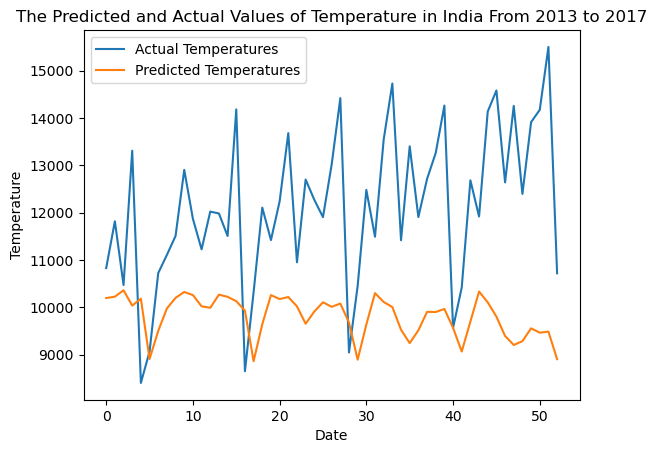

In [18]:
import matplotlib.pyplot as plt

plt.plot(index, y_test, label = 'Actual Temperatures')

plt.plot(index, y_pred, label = 'Predicted Temperatures')

plt.legend(['Actual Temperatures', 'Predicted Temperatures'])

plt.xlabel('Date')

plt.ylabel('Temperature')

plt.title('The Predicted and Actual Values of Temperature in India From 2013 to 2017')

plt.show()